<a href="https://colab.research.google.com/github/HwangJae-won/Hands-on-machine-learning/blob/main/3_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

자세한 설명과 공부 내용은 해당 링크 참고부탁드립니다. 


https://velog.io/@emperor___one/ML-3.-Classificaition

`update 211024 추후 내용 정리 추가`

# Classification

# Setup

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "classification"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)#동시출력 가능코드
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

## 1. 데이터셋 불러오기: Minist

minist data: 70,000개의 이미지들의 모음. 각 이미지들은 784개의 feature

In [2]:
from sklearn.datasets import fetch_openml

# mnist 784 dataset을 불러오는 코드
mnist = fetch_openml('mnist_784',version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'DESCR', 'details', 'categories', 'url'])

In [3]:
X, y = mnist['data'], mnist['target'] 
#가져 올 때 데이터 형식이 달라지므로 지정

In [4]:
#데이터 크기 확인
X.shape
y.shape
#784=28*28

(70000, 784)

(70000,)

(-0.5, 27.5, 27.5, -0.5)

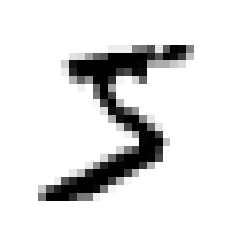

In [5]:
#0번째 데이터 그림으로 확인
import matplotlib
import matplotlib.pyplot as plt

some_digit = X[0]
some_digit_image=some_digit.reshape(28,28)
plt.imshow(some_digit_image, cmap=matplotlib.cm.binary, interpolation='nearest')
plt.axis('off')
plt.show()

In [6]:
y[0] #0번째 데이터 5임 확인

'5'

In [7]:
y = y.astype(np.int8) #형식 int로 변환

<Figure size 648x648 with 0 Axes>

Saving figure more_digits_plot


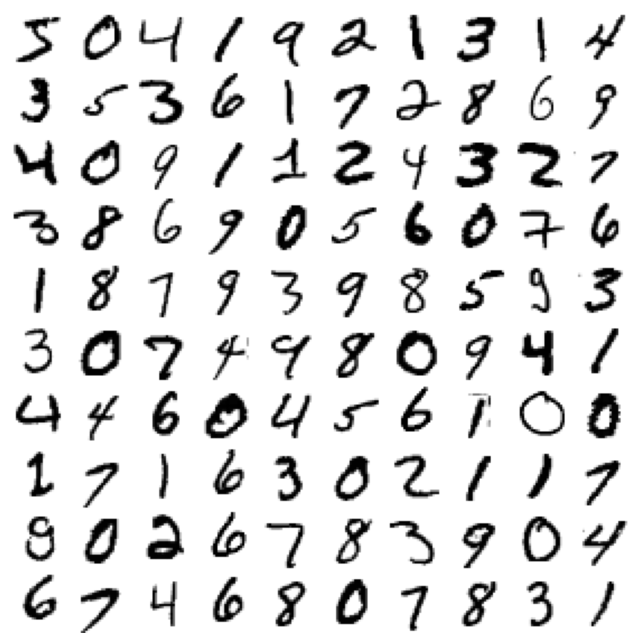

In [8]:
#전체 데이터 시각화해서 확인해보기
def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = mpl.cm.binary,
               interpolation="nearest")
    plt.axis("off")

# EXTRA
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = mpl.cm.binary, **options)
    plt.axis("off")

plt.figure(figsize=(9,9))
example_images = X[:100]
plot_digits(example_images, images_per_row=10)
save_fig("more_digits_plot")
plt.show()

데이터셋 분리

In [9]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

#오류 방지
y_train=y_train.astype(np.int8)

In [ ]:
import numpy as np
#데이터 셋을 섞어줌
shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

## 2. binary classification

5와 5가 아닌 것으로 이진 분류

In [10]:
y_train_5 = (y_train == 5)  # 5는 True, 다른 숫자는 False
y_test_5 = (y_test == 5)

In [11]:
from sklearn.linear_model import SGDClassifier

In [12]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(max_iter=5, random_state=42)
sgd_clf.fit(X_train, y_train_5)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=5,
              n_iter_no_change=5, n_jobs=None, penalty='l2', power_t=0.5,
              random_state=42, shuffle=True, tol=0.001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [13]:
# some_digit = X[35]
sgd_clf.predict([some_digit])

array([ True])

## 3. 성능 측정

1. cross-validation
2. Confusion Matrix
3. The ROC Curve

### 1. cross-validation

In [14]:
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring='accuracy')

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


array([0.9633 , 0.95695, 0.9146 ])

In [15]:
#cross validation 결과와 거의 유사함
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=3, random_state=42)

for train_index, test_index in skfolds.split(X_train, y_train_5):
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train[train_index]
    y_train_folds = y_train_5[train_index]
    X_test_fold = X_train[test_index]
    y_test_fold = y_train_5[test_index]

    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct / len(y_pred))

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=5,
              n_iter_no_change=5, n_jobs=None, penalty='l2', power_t=0.5,
              random_state=42, shuffle=True, tol=0.001, validation_fraction=0.1,
              verbose=0, warm_start=False)

0.9633


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=5,
              n_iter_no_change=5, n_jobs=None, penalty='l2', power_t=0.5,
              random_state=42, shuffle=True, tol=0.001, validation_fraction=0.1,
              verbose=0, warm_start=False)

0.95695


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=5,
              n_iter_no_change=5, n_jobs=None, penalty='l2', power_t=0.5,
              random_state=42, shuffle=True, tol=0.001, validation_fraction=0.1,
              verbose=0, warm_start=False)

0.9146


In [16]:
#모든 숫자를 5가 아님으로 분류
from sklearn.base import BaseEstimator

class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)
    
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.91125, 0.90855, 0.90915])

모든 숫자를 5가 아님으로 분류해도 정확도가 90% 이상: 전체 데이터셋 중 10% 정도만이 숫자 5이기 때문

따라서, 정확도(accuracy)를 성능 측정 지표로 사용하는 것은 불균형한 데이터셋을 다룰 때 유용하지 않다.

### 2. confusion matrix

- TP : True-Positive, 1이라고 예측했는데, 실제로도 1인 경우 → 정답
- TN : True-Negative, 0이라고 예측했는데, 실제로도 0일 경우 → 정답
- FP : False-Positive, 1이라고 예측했는데, 실제로는 0인 경우
- FN : False-Negative, 0이라고 예측했는데, 실제로는 1인 경우

In [19]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)
y_train_pred

from sklearn.metrics import confusion_matrix

confusion_matrix(y_train_5, y_train_pred )

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


array([ True, False, False, ...,  True, False,  True])

array([[52336,  2243],
       [ 1060,  4361]])

In [20]:
#완벽한 분류기의 경우
confusion_matrix(y_train_5, y_train_5)

array([[54579,     0],
       [    0,  5421]])

In [21]:
#정밀도
precision = 3996 / (3996 + 1090) #TP/(TP+FP)
precision

from sklearn.metrics import precision_score, recall_score

precision_score(y_train_5, y_train_pred)

0.7856861974046402

0.6603573591762568

In [22]:
#재현율
recall = 3996 / (3996 + 1425) #TP/(TP+FN)
recall

recall_score(y_train_5, y_train_pred)

0.7371333702268954

0.8044641210108836

In [26]:
#F1 score
from sklearn.metrics import f1_score

f1_score(y_train_5, y_train_pred)

0.7253222453222454

In [31]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3,
                             method="decision_function")

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


<Figure size 576x288 with 0 Axes>

Saving figure precision_recall_vs_threshold_plot


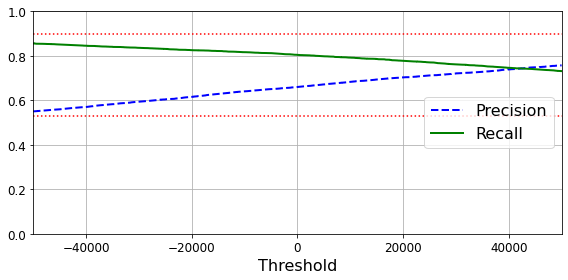

In [32]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.legend(loc="center right", fontsize=16) # Not shown in the book
    plt.xlabel("Threshold", fontsize=16)        # Not shown
    plt.grid(True)                              # Not shown
    plt.axis([-50000, 50000, 0, 1])             # Not shown



recall_90_precision = recalls[np.argmax(precisions >= 0.90)]
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]


plt.figure(figsize=(8, 4))                                                                  # Not shown
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.plot([threshold_90_precision, threshold_90_precision], [0., 0.9], "r:")                 # Not shown
plt.plot([-50000, threshold_90_precision], [0.9, 0.9], "r:")                                # Not shown
plt.plot([-50000, threshold_90_precision], [recall_90_precision, recall_90_precision], "r:")# Not shown
plt.plot([threshold_90_precision], [0.9], "ro")                                             # Not shown
plt.plot([threshold_90_precision], [recall_90_precision], "ro")                             # Not shown
save_fig("precision_recall_vs_threshold_plot")                                              # Not shown
plt.show()

정밀도와 재현율은 trade-off 관계

<Figure size 576x432 with 0 Axes>

Saving figure precision_vs_recall_plot


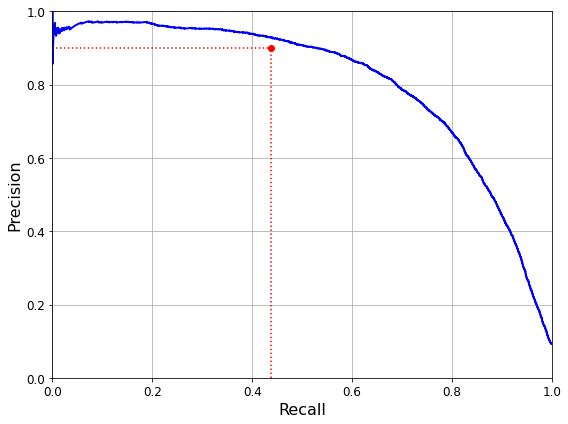

In [33]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])
    plt.grid(True)

plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)
plt.plot([0.4368, 0.4368], [0., 0.9], "r:")
plt.plot([0.0, 0.4368], [0.9, 0.9], "r:")
plt.plot([0.4368], [0.9], "ro")
save_fig("precision_vs_recall_plot")
plt.show()

### 3. ROC curve

In [34]:
#각 샘플의 점수  #결정 점수 반환
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3,
                             method="decision_function")
y_scores

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


array([  71310.55527761, -387500.63283774, -920073.77996782, ...,
        427605.84193656, -151452.95935099,   21486.8065185 ])

In [35]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

<Figure size 576x432 with 0 Axes>

Saving figure roc_curve_plot


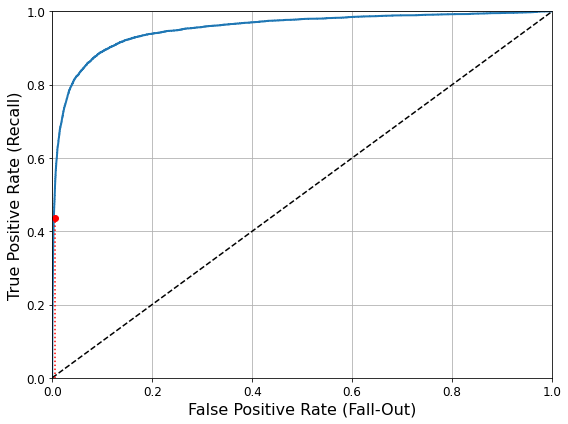

In [37]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
    plt.axis([0, 1, 0, 1])                                    # Not shown in the book
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) # Not shown
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)    # Not shown
    plt.grid(True)                                            # Not shown

plt.figure(figsize=(8, 6))                         # Not shown
plot_roc_curve(fpr, tpr)
plt.plot([4.837e-3, 4.837e-3], [0., 0.4368], "r:") # Not shown
plt.plot([0.0, 4.837e-3], [0.4368, 0.4368], "r:")  # Not shown
plt.plot([4.837e-3], [0.4368], "ro")               # Not shown
save_fig("roc_curve_plot")                         # Not shown
plt.show()

좋은 분류기는 점선으로부터 멀리 떨어짐

AUC(Area Under the Curve)을 측정하면 분류기들을 성능을 비교할 수 있다. AUC는 1에 가까울 수록 좋은 분류기

In [38]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train_5, y_scores)

0.9536789698168869

5인지 아닌지 분류해줌

## 3. Multiclass Classification

다중 분류(multiclass/multinomial classification)는 말그대로 둘 이상의 클래스로 분류하는 것을 말한다.

RandomForest나 Naive Bayes같은 알고리즘은 알고리즘에서 직접 다중 분류가 가능하지만, SVM이나 Logistic Regression같은 알고리즘은 이진 분류(binary classification)만 가능하다.

하지만, 이러한 이진 분류 알고리즘을 여러 번 사용해 다중 클래스를 분류할 수 있는 기법(트릭)이 있다.

OvA(One versus All, One versus the rest, OvR)
OvA(일대다)방법은 예를 들어, MNIST 데이터에서 특정 숫자 하나만 분류하는 (1인지 아닌지?, 2인지 아닌지?) 이진 분류기를 10개 만들어 그 중 가장 높은 확률(점수)값을 가지는 클래스로 분류해주는 방법이다.

OvO(One versus One)
OvO(일대일) 방법은 0과 1, 0과 2, 1과 2 구별 등과 같이 각 클래스의 조합마다 이진 분류기를 만들어 학습시키는 방법이다. 이 방법은 클래스가 $N$개인 경우 $\frac{N \times \left( N-1 \right)}{2}$ 개가 필요하다.

$$
\binom{N}{2} = \frac{N!}{2! \left(N-2\right)!} = \frac{N \times \left( N-1 \right)}{2}
$$
MNIST의 경우에는 45개의 분류기를 만들어 가장 많이 Positive로 분류된 클래스를 선택한다.

SVM같은 알고리즘은 Train Set의 크기에 민감하기 때문에 작은 Train Set에서 여러개의 분류기를 학습시키는 것이 빠르기 때문에 OvO를 사용하지만, 대부분의 이진 분류 알고리즘은 OvA를 사용한다.

Scikit-Learn에서는 이진 분류 알고리즘을 이용해 다중 분류를 수행할 경우 자동으로 OvA(또는 SVM일 경우 OvO)를 적용해 학습한다

In [ ]:
sgd_clf.fit(X_train, y_train)

/Users/hwangjaewon/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


SGDClassifier(max_iter=5, random_state=42)

In [ ]:
sgd_clf.predict([some_digit])

array([4], dtype=int8)

In [ ]:
some_digit_scores = sgd_clf.decision_function([some_digit])
some_digit_scores

array([[-734508.41624573, -342070.72038267, -767673.8708879 ,
        -163633.61941891, -151146.40642725, -329820.60118062,
        -769408.37122342, -333585.61781438, -449269.18196651,
        -206479.55387129]])

In [ ]:
np.argmax(some_digit_scores)

4

In [1]:
from sklearn.svm import SVC
svm_clf= SVC()
svm_clf.fit(X_train, y_train)
svm_clf.predict([some_digit])

some_digit_scores=svm_clf.decision_function([some digit])
some_digit_scores


NameError: ignored

In [ ]:
from sklearn.multiclass import OneVsOneClassifier

ovo_clf = OneVsOneClassifier(SGDClassifier(max_iter=5, random_state=42))
ovo_clf.fit(X_train, y_train)

ovo_clf.predict([some_digit])
len(ovo_clf.estimators_)

/Users/hwangjaewon/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
/Users/hwangjaewon/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
/Users/hwangjaewon/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
/Users/hwangjaewon/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:570: Convergence

OneVsOneClassifier(estimator=SGDClassifier(max_iter=5, random_state=42))

array([4], dtype=int8)

45

randomforest 등은 다중 분류 바로 가능

## 4. Error Analysis

In [ ]:
#데이터 스케일링
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

/Users/hwangjaewon/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
/Users/hwangjaewon/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
/Users/hwangjaewon/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


array([0.90945, 0.90665, 0.91   ])

In [ ]:
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

/Users/hwangjaewon/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
/Users/hwangjaewon/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
/Users/hwangjaewon/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


array([[5725,    2,   25,   11,    9,   54,   46,    9,   39,    3],
       [   2, 6451,   52,   32,    5,   46,    6,   10,  126,   12],
       [  51,   38, 5330,  103,   89,   29,   87,   59,  156,   16],
       [  44,   44,  151, 5307,    1,  262,   32,   56,  140,   94],
       [  22,   26,   37,   12, 5358,   11,   52,   35,   82,  207],
       [  65,   43,   35,  168,   70, 4661,   91,   27,  167,   94],
       [  33,   23,   44,    2,   45,  111, 5602,    7,   51,    0],
       [  23,   23,   72,   31,   47,    9,    5, 5813,   14,  228],
       [  43,  141,   76,  154,   12,  181,   54,   29, 5021,  140],
       [  40,   27,   27,   89,  166,   39,    2,  228,   77, 5254]])

In [ ]:
import seaborn as sns

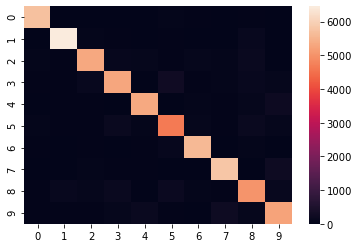

In [ ]:
sns.heatmap(conf_mx);
#주대각선: 이미지가 올바르게 분류됨을 나타내는 부분

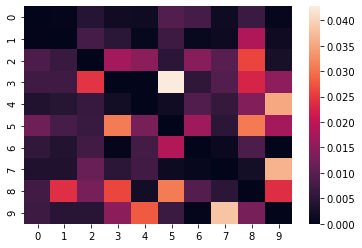

In [ ]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums
np.fill_diagonal(norm_conf_mx, 0)
sns.heatmap(norm_conf_mx);

행은 실제 클래스, 열은 예측한 클래스, 클래스 8이 다른 곳에 비해 밝음

In [ ]:
# 숫자 그림을 위한 추가 함수
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = matplotlib.cm.binary, **options)
    plt.axis("off")

<Figure size 576x576 with 0 Axes>

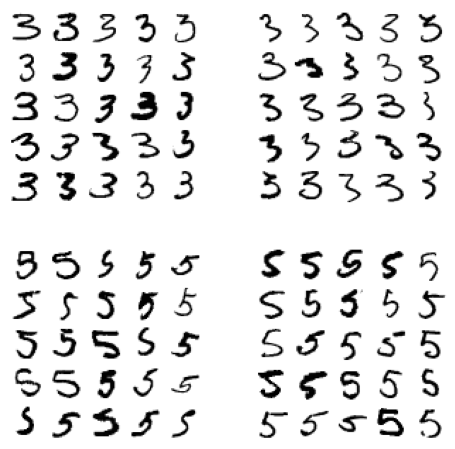

In [ ]:
cl_a, cl_b = 3, 5
X_aa = X_train[(y_train == cl_a) & (y_train_pred == cl_a)]
X_ab = X_train[(y_train == cl_a) & (y_train_pred == cl_b)]
X_ba = X_train[(y_train == cl_b) & (y_train_pred == cl_a)]
X_bb = X_train[(y_train == cl_b) & (y_train_pred == cl_b)]

plt.figure(figsize=(8,8))
plt.subplot(221); plot_digits(X_aa[:25], images_per_row=5)
plt.subplot(222); plot_digits(X_ab[:25], images_per_row=5)
plt.subplot(223); plot_digits(X_ba[:25], images_per_row=5)
plt.subplot(224); plot_digits(X_bb[:25], images_per_row=5)
plt.show()

## 5. multilabel classification (다중 레이블 분류)

숫자 이미지가 주어졌을 때 첫번째 클래스는 7보다 크거나 같은지(>=7), 두 번째 클래스는 홀수(odd)인지를 분류

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

y_train_large = (y_train >= 7)
y_train_odd = (y_train % 2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd]

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

KNeighborsClassifier()

In [ ]:
knn_clf.predict([some_digit])  # 5는 7보다 작거나 같고 홀수임

array([[ True,  True]])

## 6. 다중 출력 분류

다중 레이블 분류에서 한 레이블이 다중 클래스가 될 수 있도록 일반화-> 하나가 값을 두개 이상 가질 수 있음

*이미지에서 잡음을 제거하는 시스템

In [ ]:
#노이즈 있는 그림 만들기 
noise = np.random.randint(0, 100, (len(X_train), 784))
noise = np.random.randint(0, 100, (len(X_test), 784))
X_test_mod = X_test + noise
y_train_mod = X_train
y_test_mod = X_test

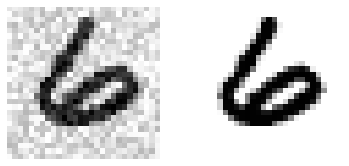

In [ ]:
#픽셀 강도에 잡음 추가 
X_train_mod = X_train + noise
def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = matplotlib.cm.binary,
               interpolation="nearest")
    plt.axis("off")
    
some_index = 5501
plt.subplot(121); plot_digit(X_test_mod[some_index])
plt.subplot(122); plot_digit(y_test_mod[some_index])
plt.show()

KNeighborsClassifier()

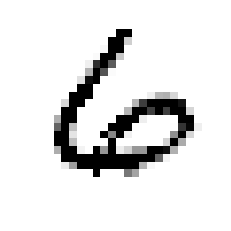

In [ ]:
#깨끗한 이미지 출력하는 코드 
knn_clf.fit(X_train_mod, y_train_mod)
clean_digit = knn_clf.predict([X_test_mod[some_index]])
plot_digit(clean_digit)